<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/CNN_Lab_01_%E2%80%94_Basic_Image_Classification_(Fashion_MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN Lab 01 — Basic Image Classification (Fashion-MNIST)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
Available GPUs: []


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("Training shape:", x_train.shape, y_train.shape)
print("Test shape    :", x_test.shape, y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28) (60000,)
Test shape    : (10000, 28, 28) (10000,)


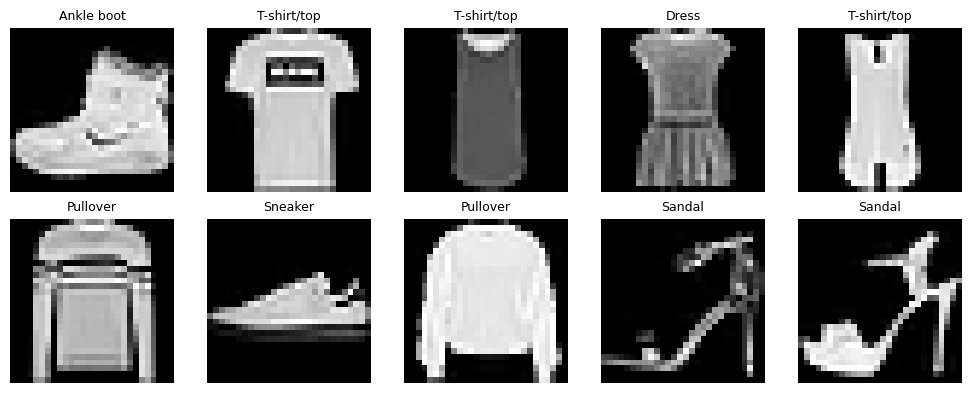

In [3]:
class_names = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]], fontsize=9)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

print("Min/Max (train):", x_train.min(), x_train.max())

Min/Max (train): 0.0 1.0


In [5]:
x_train_cnn = x_train[..., np.newaxis]  # (N, 28, 28, 1)
x_test_cnn  = x_test[..., np.newaxis]

print("CNN train shape:", x_train_cnn.shape)
print("CNN test shape :", x_test_cnn.shape)

CNN train shape: (60000, 28, 28, 1)
CNN test shape : (10000, 28, 28, 1)


In [6]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [10]:
history = model.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.7435 - loss: 0.7537 - val_accuracy: 0.8622 - val_loss: 0.3911
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 62s 146ms/step - accuracy: 0.8766 - loss: 0.3504 - val_accuracy: 0.8813 - val_loss: 0.3285
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.8981 - loss: 0.2881 - val_accuracy: 0.8807 - val_loss: 0.3264
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 60s 141ms/step - accuracy: 0.9044 - loss: 0.2621 - val_accuracy: 0.8997 - val_loss: 0.2731
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 58s 138ms/step - accuracy: 0.9117 - loss: 0.2435 - val_accuracy: 0.8947 - val_loss: 0.2864


In [11]:
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print("Test Loss    :", round(test_loss, 4))
print("Test Accuracy:", round(test_acc, 4))

Test Loss    : 0.3046
Test Accuracy: 0.8912


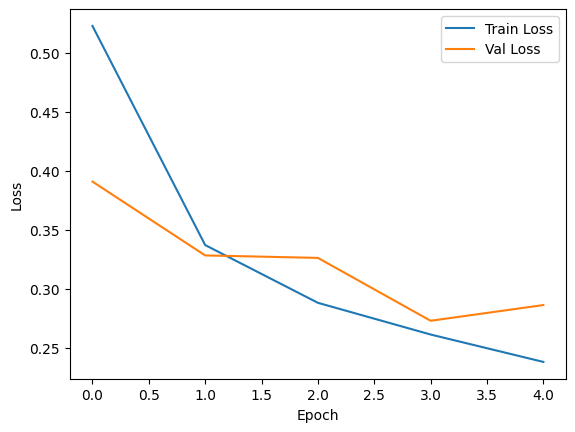

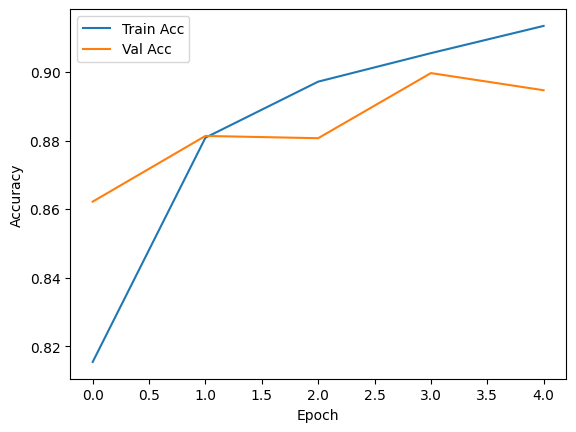

In [12]:
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

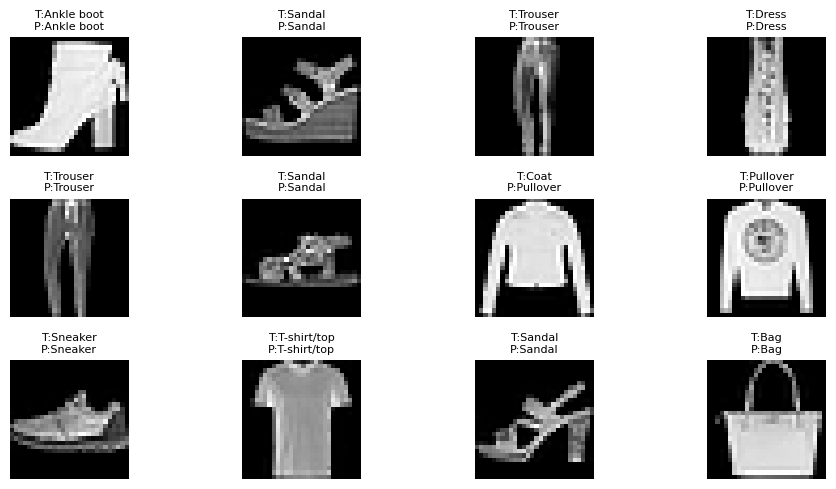

In [13]:
# Pick 12 random test samples
idx = np.random.choice(len(x_test_cnn), size=12, replace=False)
x_samples = x_test_cnn[idx]
y_true = y_test[idx]

y_prob = model.predict(x_samples, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

plt.figure(figsize=(10,5))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(x_samples[i].squeeze(), cmap="gray")
    title = f"T:{class_names[y_true[i]]}\nP:{class_names[y_pred[i]]}"
    plt.title(title, fontsize=8)
    plt.axis("off")
plt.tight_layout()
plt.show()

## Model Summary and Test Accuracy

**Model Summary (Architecture):**
```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
=================================================================
Total params: 220234 (859.51 KB)
Trainable params: 220234 (859.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
```

**Final Test Accuracy:**
```
Test Accuracy: 0.8912
```